# Bikes Demand using MLR Algorithm

In [810]:
import warnings
warnings.filterwarnings('ignore')

In [811]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

## Reading the dataset

In [812]:
bikes=pd.read_csv('day.csv',parse_dates=['dteday'])

In [813]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [814]:
# droping the columns which are not needed for analysis
bikes=bikes.drop(columns=['instant','dteday','atemp','casual','registered'])

In [815]:
# Converting the numerical columns into Categorical with Labeling 

bikes.season=bikes.season.replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
#bikes.yr=bikes.yr.replace({'1':'2019','0':'2018' })
bikes.mnth=bikes.mnth.replace({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bikes.weathersit=bikes.weathersit.replace({1:'Clear',2:'Mist',3:'Light Snow' })
bikes.weekday=bikes.weekday.replace({6:'Saturday',0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday' })

In [816]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


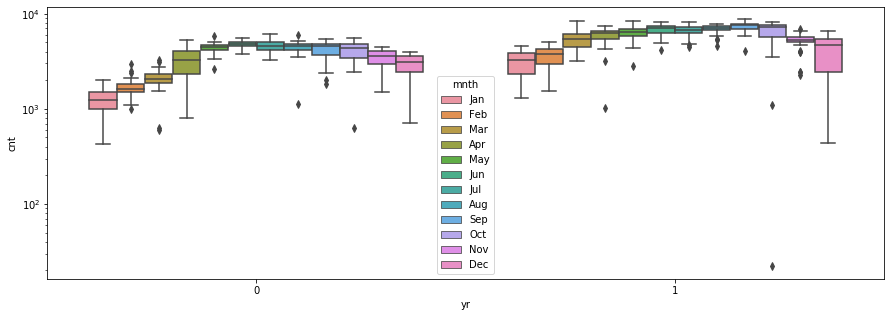

In [817]:
# understanding the distribution of customers demand across all the months in both 2018 (0) and 2019 (1)
plt.figure(figsize=(15,5))
sns.boxplot(x='yr',y='cnt',data=bikes,hue='mnth')
plt.yscale("log")
plt.show()

- Observation : Slight dip in Demand in July and gradually going down during the last quarter of the year (oct, nov, dec) 

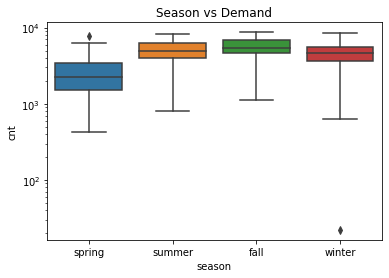

In [818]:
# ploting the sceson vs Demand
sns.boxplot(x='season',y='cnt',data=bikes)
plt.yscale("log")
plt.title('Season vs Demand')
plt.show()

- More demand during the season Fall

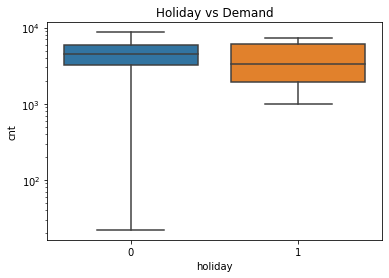

In [819]:
sns.boxplot(x='holiday',y='cnt',data=bikes)
plt.yscale("log")
plt.title('Holiday vs Demand')
plt.show()

- More demand on non Holidays

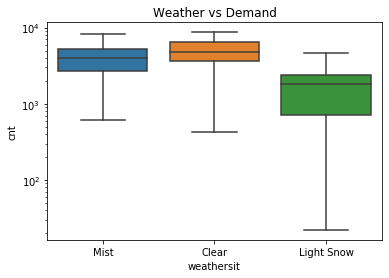

In [820]:
sns.boxplot(x='weathersit',y='cnt',data=bikes)
plt.yscale("log")
plt.title('Weather vs Demand')
plt.show()

- More demand when  Weather is Clear

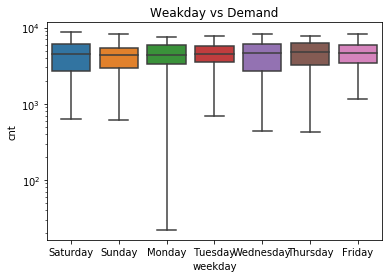

In [821]:
sns.boxplot(x='weekday',y='cnt',data=bikes)
plt.yscale("log")
plt.title('Weakday vs Demand')
plt.show()

- No variation in demand across the weekdays, but Monday has huge spread among others

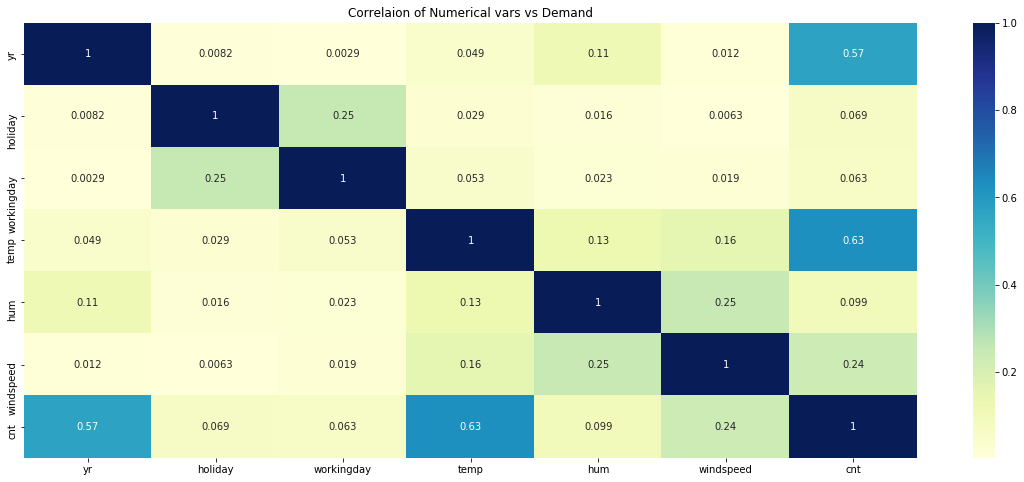

In [729]:
plt.figure(figsize=(20,8))

sns.heatmap(abs(bikes.corr()),cmap='YlGnBu',annot=True)
plt.title('Correlaion of Numerical vars vs Demand')
plt.show()

In [730]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,Mist,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,Mist,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,1600


In [731]:
# Converting the categorical variables into numarical variables by creating dummies
a=pd.get_dummies(bikes['mnth'],drop_first=True)
b=pd.get_dummies(bikes['weathersit'],drop_first=True)
c=pd.get_dummies(bikes['season'],drop_first=True)
d=pd.get_dummies(bikes['weekday'],drop_first=True)

In [732]:
# merging the new features to original dataset
bikes=pd.concat((bikes,a),axis=1)
bikes=pd.concat((bikes,b),axis=1)
bikes=pd.concat((bikes,c),axis=1)
bikes=pd.concat((bikes,d),axis=1)

In [733]:
# droppin the categorical vars as the corresponding numerical vars are added to dataset
bikes=bikes.drop(columns=['mnth','weathersit','season','weekday'])

In [734]:
#bikes['heatIndex']= (0.8*(bikes['temp'])) + (bikes['hum']*(bikes['temp']-14.4)/100) + 46.4

In [735]:
bikes.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Mist,spring,summer,winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,1,1,0,0,0,1,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,1,1,0,0,0,0,1,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,1,0,0,0,0,0,0,0,1


## Splitting the data into train and test data

In [736]:
#importing the required libraries
from sklearn.model_selection import train_test_split

In [737]:
#splitting the data into train and test
np.random.seed(0)
df_train,df_test=train_test_split(bikes,train_size=0.7,test_size=0.3,random_state=100)

In [738]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Mist,spring,summer,winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
653,1,0,1,19.201653,55.8333,12.208807,7534,0,0,0,...,0,0,0,1,0,0,0,0,1,0
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,16.980847,62.1250,10.792293,4066,0,0,0,...,1,1,0,0,0,1,0,0,0,0
728,1,0,0,10.489153,48.3333,23.500518,1796,0,1,0,...,0,1,0,0,0,0,1,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,0,0,0,...,1,0,1,0,0,1,0,0,0,0


##  Scalling the train Data using MinMaxScaler

In [739]:
from sklearn.preprocessing import MinMaxScaler

In [740]:
scaler=MinMaxScaler()

In [741]:
vars=['temp','hum','windspeed','cnt']

In [742]:
#transformaing the variables into scalled and the resultant values are in the range between 0 and 1
df_train[vars]=scaler.fit_transform(df_train[vars])

In [743]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Mist,spring,summer,winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,0,...,0,0,0,1,0,0,0,0,1,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,0,0,...,1,1,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,0,1,0,...,0,1,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,0,0,...,1,0,1,0,0,1,0,0,0,0


In [744]:
# subsetting the train data into target and predictor variables
y_train = df_train['cnt']
X_train= df_train.loc[:, df_train.columns !='cnt']

In [745]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,Aug,Dec,Feb,Jan,...,Mist,spring,summer,winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
653,1,0,1,0.509887,0.575354,0.300794,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0


## Model selection

In [746]:
# using RFE method for feature selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [747]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [748]:
rfe=RFE(lm,15)
rfe = rfe.fit(X_train, y_train)

In [749]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 8),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 9),
 ('Mar', False, 14),
 ('May', False, 5),
 ('Nov', False, 2),
 ('Oct', False, 10),
 ('Sep', True, 1),
 ('Light Snow', True, 1),
 ('Mist', True, 1),
 ('spring', True, 1),
 ('summer', False, 13),
 ('winter', True, 1),
 ('Monday', False, 6),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 11),
 ('Tuesday', False, 7),
 ('Wednesday', False, 12)]

In [750]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Jan', 'Jul',
       'Sep', 'Light Snow', 'Mist', 'spring', 'winter', 'Saturday', 'Sunday'],
      dtype='object')

## Model using OLS

In [751]:
X_train_rfe=X_train[col]

In [752]:
X_train_rfe.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Jan', 'Jul',
       'Sep', 'Light Snow', 'Mist', 'spring', 'winter', 'Saturday', 'Sunday'],
      dtype='object')

In [753]:

import statsmodels.api as sm
X_train_rfe=sm.add_constant(X_train_rfe)
lm= sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     193.0
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          4.03e-190
Time:                        22:18:07   Log-Likelihood:                 514.17
No. Observations:                 510   AIC:                            -998.3
Df Residuals:                     495   BIC:                            -934.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2503      0.025      9.865      0.000       0.200       0.300
yr             0.2316      0.008     28.670      0.000       0.216       0.247
holiday       -0.0060      0.021     -0.284      0.776      -0.048       0.036
workingday     0.0965      0.009     10.419      0.000       0.078       0.115
temp           0.4610      0.031     14.686      0.000       0.399       0.523
hum           -0.1419      0.038     -3.783      0.000      -0.216      -0.068
windspeed     -0.1757      0.026     -6.878      0.000      -0.226      -0.126
Jan           -0.0402      0.017     -2.304      0.022      -0.074      -0.006
Jul           -0.0744      0.017     -4.357      0.000      -0.108      -0.041
Sep            0.0602      0.015      3.919      0.000       0.030       0.090
Light Snow    -0.2538      0.026     -9.670      0.000      -0.305      -0.202
Mist          -0.0593      0.010     -5.660      0.000      -0.080      -0.039
spring        -0.0979      0.015     -6.420      0.000      -0.128      -0.068
winter         0.0538      0.012      4.353      0.000       0.030       0.078
Saturday       0.1066      0.011      9.369      0.000       0.084       0.129
Sunday         0.0533      0.012      4.462      0.000       0.030       0.077
==============================================================================
Omnibus:                       63.289   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.287
Skew:                          -0.629   Prob(JB):                     5.75e-36
Kurtosis:                       5.460   Cond. No.                     1.25e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.48e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [754]:
X_train_new=X_train_rfe.drop('holiday',axis=1)

In [755]:
#X_train=X_train.drop(columns=['Nov'])
import statsmodels.api as sm
X_train_new=sm.add_constant(X_train_new)
lm= sm.OLS(y_train,X_train_new).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     193.0
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          4.03e-190
Time:                        22:18:07   Log-Likelihood:                 514.17
No. Observations:                 510   AIC:                            -998.3
Df Residuals:                     495   BIC:                            -934.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2443      0.040      6.120      0.000       0.166       0.323
yr             0.2316      0.008     28.670      0.000       0.216       0.247
workingday     0.1025      0.026      4.014      0.000       0.052       0.153
temp           0.4610      0.031     14.686      0.000       0.399       0.523
hum           -0.1419      0.038     -3.783      0.000      -0.216      -0.068
windspeed     -0.1757      0.026     -6.878      0.000      -0.226      -0.126
Jan           -0.0402      0.017     -2.304      0.022      -0.074      -0.006
Jul           -0.0744      0.017     -4.357      0.000      -0.108      -0.041
Sep            0.0602      0.015      3.919      0.000       0.030       0.090
Light Snow    -0.2538      0.026     -9.670      0.000      -0.305      -0.202
Mist          -0.0593      0.010     -5.660      0.000      -0.080      -0.039
spring        -0.0979      0.015     -6.420      0.000      -0.128      -0.068
winter         0.0538      0.012      4.353      0.000       0.030       0.078
Saturday       0.1126      0.027      4.171      0.000       0.060       0.166
Sunday         0.0593      0.027      2.186      0.029       0.006       0.113
==============================================================================
Omnibus:                       63.289   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.287
Skew:                          -0.629   Prob(JB):                     5.75e-36
Kurtosis:                       5.460   Cond. No.                         24.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [756]:
X_train_nc = X_train_new.drop(['const'], axis=1)

In [757]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_nc
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,29.73
2,temp,18.10
1,workingday,17.04
12,Saturday,4.60
4,windspeed,4.55
13,Sunday,4.47
10,spring,3.11
9,Mist,2.28
11,winter,2.18
0,yr,2.09


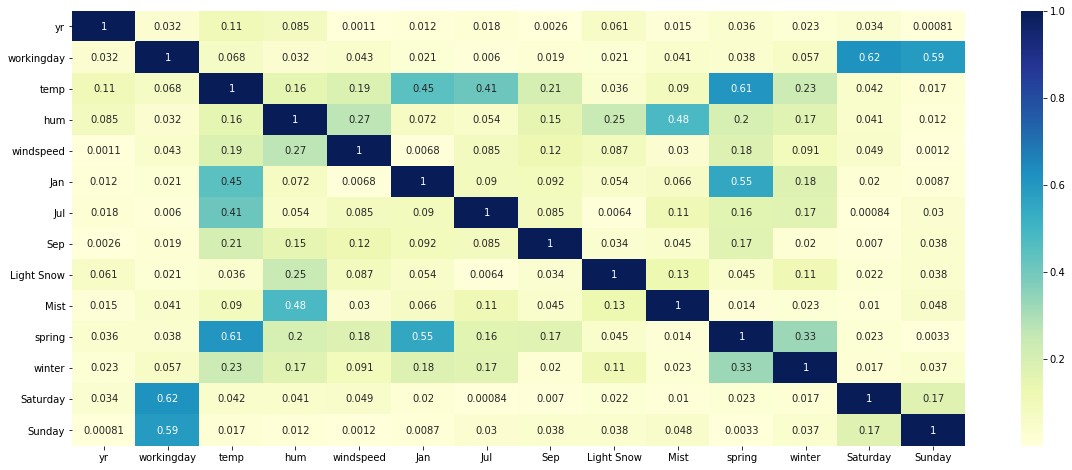

In [758]:
plt.figure(figsize=(20,8))

sns.heatmap(abs(X_train_nc.corr()),cmap='YlGnBu',annot=True)

In [759]:
X_train_new=X_train_new.drop('Jan',axis=1)
#X_train=X_train.drop(columns=['Nov'])
import statsmodels.api as sm
X_train_new=sm.add_constant(X_train_new)
lm= sm.OLS(y_train,X_train_new).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.6
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          3.81e-190
Time:                        22:18:09   Log-Likelihood:                 511.45
No. Observations:                 510   AIC:                            -994.9
Df Residuals:                     496   BIC:                            -935.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2331      0.040      5.857      0.000       0.155       0.311
yr             0.2307      0.008     28.473      0.000       0.215       0.247
workingday     0.1033      0.026      4.026      0.000       0.053       0.154
temp           0.4788      0.031     15.671      0.000       0.419       0.539
hum           -0.1466      0.038     -3.898      0.000      -0.221      -0.073
windspeed     -0.1686      0.025     -6.622      0.000      -0.219      -0.119
Jul           -0.0779      0.017     -4.560      0.000      -0.111      -0.044
Sep            0.0595      0.015      3.853      0.000       0.029       0.090
Light Snow    -0.2513      0.026     -9.541      0.000      -0.303      -0.200
Mist          -0.0594      0.011     -5.648      0.000      -0.080      -0.039
spring        -0.1067      0.015     -7.194      0.000      -0.136      -0.078
winter         0.0579      0.012      4.712      0.000       0.034       0.082
Saturday       0.1131      0.027      4.171      0.000       0.060       0.166
Sunday         0.0605      0.027      2.218      0.027       0.007       0.114
==============================================================================
Omnibus:                       61.396   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.940
Skew:                          -0.607   Prob(JB):                     3.07e-35
Kurtosis:                       5.450   Cond. No.                         24.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [760]:
X_train_nc = X_train_new.drop(['const'], axis=1)
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_nc
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,29.19
2,temp,17.24
1,workingday,16.92
11,Saturday,4.57
4,windspeed,4.52
12,Sunday,4.45
9,spring,2.79
8,Mist,2.27
10,winter,2.15
0,yr,2.08


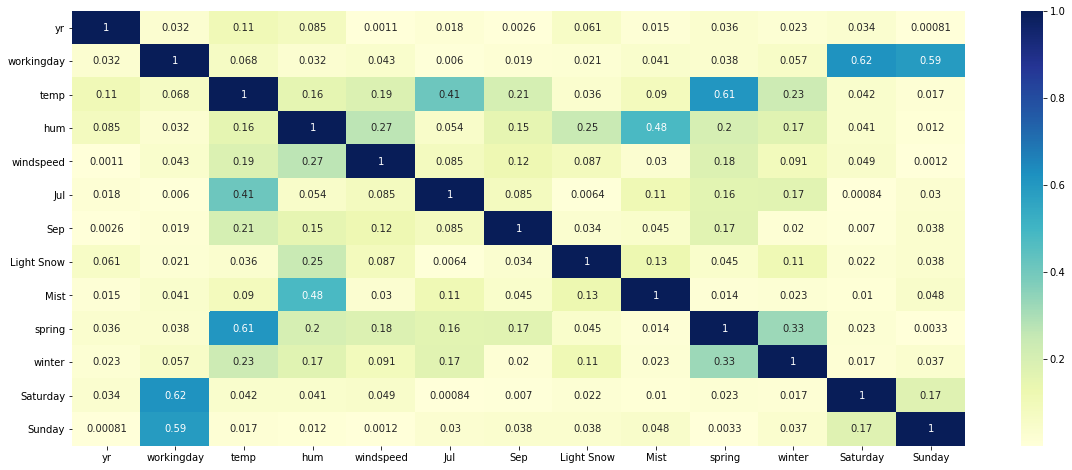

In [761]:
plt.figure(figsize=(20,8))

sns.heatmap(abs(X_train_nc.corr()),cmap='YlGnBu',annot=True)

In [762]:
X_train_new=X_train_new.drop('Sunday',axis=1)
#X_train=X_train.drop(columns=['Nov'])
import statsmodels.api as sm
X_train_new=sm.add_constant(X_train_new)
lm= sm.OLS(y_train,X_train_new).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          2.88e-190
Time:                        22:18:10   Log-Likelihood:                 508.93
No. Observations:                 510   AIC:                            -991.9
Df Residuals:                     497   BIC:                            -936.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2842      0.033      8.725      0.000       0.220       0.348
yr             0.2310      0.008     28.393      0.000       0.215       0.247
workingday     0.0518      0.011      4.714      0.000       0.030       0.073
temp           0.4786      0.031     15.602      0.000       0.418       0.539
hum           -0.1449      0.038     -3.837      0.000      -0.219      -0.071
windspeed     -0.1692      0.026     -6.616      0.000      -0.219      -0.119
Jul           -0.0769      0.017     -4.484      0.000      -0.111      -0.043
Sep            0.0572      0.015      3.699      0.000       0.027       0.088
Light Snow    -0.2505      0.026     -9.475      0.000      -0.302      -0.199
Mist          -0.0591      0.011     -5.600      0.000      -0.080      -0.038
spring        -0.1081      0.015     -7.269      0.000      -0.137      -0.079
winter         0.0566      0.012      4.596      0.000       0.032       0.081
Saturday       0.0617      0.014      4.358      0.000       0.034       0.090
==============================================================================
Omnibus:                       68.023   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.580
Skew:                          -0.653   Prob(JB):                     3.05e-41
Kurtosis:                       5.660   Cond. No.                         20.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [763]:
X_train_nc = X_train_new.drop(['const'], axis=1)
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_nc
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,23.18
2,temp,15.91
1,workingday,4.63
4,windspeed,4.12
9,spring,2.59
8,Mist,2.23
10,winter,2.09
0,yr,2.06
11,Saturday,1.82
5,Jul,1.40


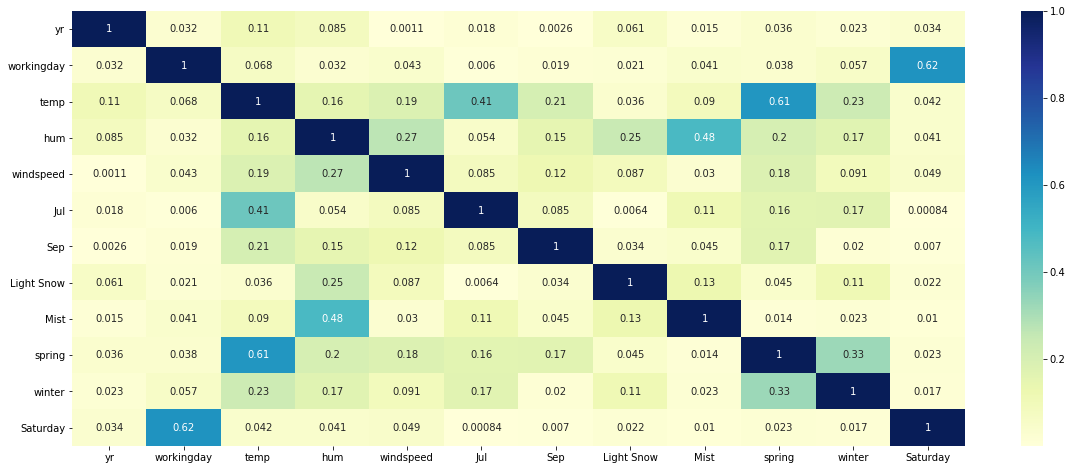

In [764]:
plt.figure(figsize=(20,8))

sns.heatmap(abs(X_train_nc.corr()),cmap='YlGnBu',annot=True)

In [765]:
X_train_new=X_train_new.drop('Saturday',axis=1)
#X_train=X_train.drop(columns=['Nov'])
import statsmodels.api as sm
X_train_new=sm.add_constant(X_train_new)
lm= sm.OLS(y_train,X_train_new).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.6
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          1.99e-187
Time:                        22:18:11   Log-Likelihood:                 499.37
No. Observations:                 510   AIC:                            -974.7
Df Residuals:                     498   BIC:                            -923.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3204      0.032      9.993      0.000       0.257       0.383
yr             0.2302      0.008     27.804      0.000       0.214       0.246
workingday     0.0221      0.009      2.515      0.012       0.005       0.039
temp           0.4801      0.031     15.378      0.000       0.419       0.541
hum           -0.1574      0.038     -4.107      0.000      -0.233      -0.082
windspeed     -0.1690      0.026     -6.494      0.000      -0.220      -0.118
Jul           -0.0777      0.017     -4.452      0.000      -0.112      -0.043
Sep            0.0576      0.016      3.662      0.000       0.027       0.089
Light Snow    -0.2418      0.027     -9.010      0.000      -0.294      -0.189
Mist          -0.0552      0.011     -5.155      0.000      -0.076      -0.034
spring        -0.1088      0.015     -7.188      0.000      -0.139      -0.079
winter         0.0558      0.013      4.446      0.000       0.031       0.080
==============================================================================
Omnibus:                       58.852   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.266
Skew:                          -0.530   Prob(JB):                     1.95e-39
Kurtosis:                       5.695   Cond. No.                         20.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [766]:
X_train_nc = X_train_new.drop(['const'], axis=1)
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_nc
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,22.85
2,temp,15.57
4,windspeed,4.03
1,workingday,3.02
9,spring,2.55
8,Mist,2.23
10,winter,2.08
0,yr,2.06
5,Jul,1.40
6,Sep,1.20


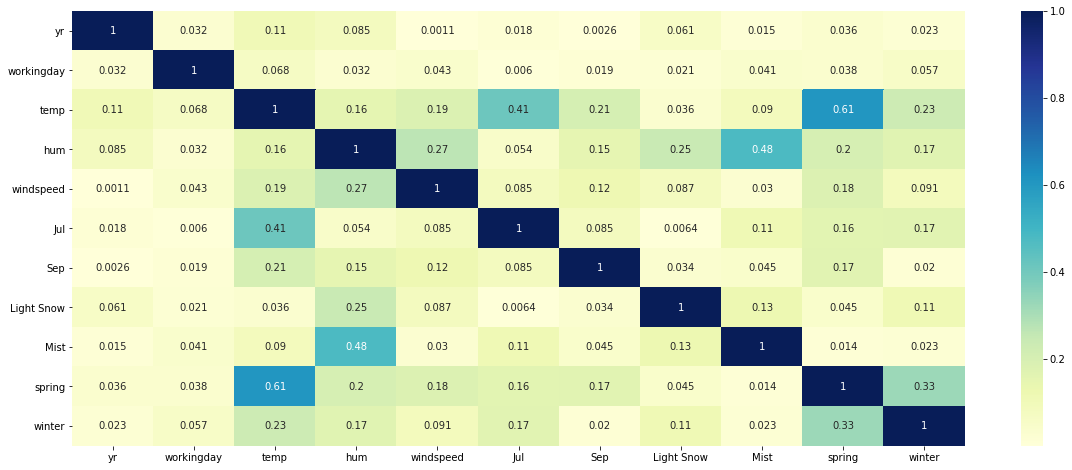

In [767]:
plt.figure(figsize=(20,8))

sns.heatmap(abs(X_train_nc.corr()),cmap='YlGnBu',annot=True)

## Residual Analysis of the train data

In [768]:
y_train_cnt = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

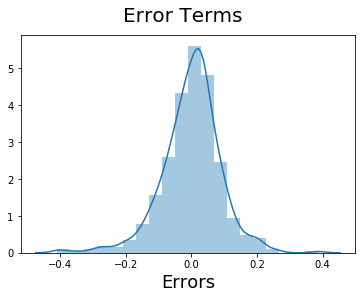

In [769]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [770]:
vars=['temp','hum','windspeed','cnt']
df_test[vars]=scaler.transform(df_test[vars])

In [771]:
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Mist,spring,summer,winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,1,0,0,0,1,0,0,0,0,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,0,0,...,0,0,1,0,0,0,0,0,0,1
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,0,...,1,0,0,1,0,0,0,1,0,0
221,0,0,1,0.881625,0.437098,0.339570,0.547400,1,0,0,...,0,0,0,0,0,0,0,0,0,1
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [772]:
#subsetting the dataset into target and predictor variables
y_test = df_test['cnt']
X_test= df_test.loc[:, df_test.columns !='cnt']

In [773]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_nc.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [774]:
y_test_pred=lm.predict(X_test_new)

In [775]:
from sklearn.metrics import r2_score


In [776]:
# Model Accuracy check by r2 score
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.817802672282266

- Observation : based on the above model, 81.7% variance in the data can be explained and still multicolinearity between the predictor variables is identitfied,
    so going for the new model by creating the new variable Temparature Heat Index - THI by using Temparature and Humidity 

## Model 2 by adding new Feature Heat Index derived from Temparature and Humidity

- Heat Index formula take from Internet 
- Formula : 0.8*T + RH*(T-14.4) + 46.4

In [777]:
# derived new Feature Heat Index  from Temparature and Humidity
bikes['heatIndex']= (0.8*(bikes['temp'])) + (bikes['hum']*(bikes['temp']-14.4)/100) + 46.4

In [778]:
# droping the temp and hum features to get rid of multicollinearity in the model
bikes=bikes.drop(columns=['temp','hum'])
bikes.head()

,yr,holiday,workingday,windspeed,cnt,Aug,Dec,Feb,Jan,Jul,...,spring,summer,winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,heatIndex
0,0,0,0,10.749882,985,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,57.455669
1,0,0,0,16.652113,801,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,58.671930
2,0,0,1,16.636703,1349,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,50.064460
3,0,0,1,10.739832,1562,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,49.299303
4,0,0,1,12.522300,1600,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,51.617997


### Spliting the bikes dataset as df_train2 and df_test2

In [779]:

np.random.seed(0)
df_train2,df_test2=train_test_split(bikes,train_size=0.7,test_size=0.3,random_state=100)

### Scalling the train dataset

In [780]:
# Scalling the train dataset using MinMaxscalar 
mms=MinMaxScaler()
vars2=['windspeed','cnt','heatIndex']
df_train2[vars2]=mms.fit_transform(df_train2[vars2])

In [781]:
# splitnig the train set as target and predictor variables
y_train2 = df_train2['cnt']
X_train2 = df_train2.loc[:, df_train2.columns !='cnt']

In [782]:
X_train2.head()

,yr,holiday,workingday,windspeed,Aug,Dec,Feb,Jan,Jul,Jun,...,spring,summer,winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,heatIndex
653,1,0,1,0.300794,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0.491532
576,1,0,1,0.264686,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0.863470
426,1,0,0,0.255342,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0.424383
728,1,0,0,0.663106,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0.220013
482,1,0,0,0.188475,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0.369743


### Model Selection

In [783]:
# fitting the model and seleting the top 15 features by RFE method
lm2=LinearRegression()
lm2.fit(X_train2,y_train2)
rfe2 = RFE(lm2,15)
rfe2=rfe2.fit(X_train2,y_train2)
col=X_train2.columns[rfe2.support_]

In [784]:
# subsetting the train dataset based on the feature selection
X_train_rfe2=X_train2[col]

In [785]:
X_train_rfe2.head()

,yr,holiday,workingday,windspeed,Dec,Jan,Jul,Nov,Sep,Light Snow,Mist,spring,winter,Saturday,heatIndex
653,1,0,1,0.300794,0,0,0,0,0,0,0,0,1,0,0.491532
576,1,0,1,0.264686,0,0,1,0,0,0,0,0,0,0,0.863470
426,1,0,0,0.255342,0,0,0,0,0,0,1,1,0,1,0.424383
728,1,0,0,0.663106,1,0,0,0,0,0,0,1,0,0,0.220013
482,1,0,0,0.188475,0,0,0,0,0,0,1,0,0,1,0.369743


### Tunning the model on OLS method by eleminating the features based on p-value and VIF scores


In [786]:
# adding the constant to the predictor variables to get the intercept variable 
# otherwise model gets trained by assuming the regression passing through origin

X_train_rfe2=sm.add_constant(X_train_rfe2)

In [787]:
X_train_rfe2.head()

,const,yr,holiday,workingday,windspeed,Dec,Jan,Jul,Nov,Sep,Light Snow,Mist,spring,winter,Saturday,heatIndex
653,1.0,1,0,1,0.300794,0,0,0,0,0,0,0,0,1,0,0.491532
576,1.0,1,0,1,0.264686,0,0,1,0,0,0,0,0,0,0,0.863470
426,1.0,1,0,0,0.255342,0,0,0,0,0,0,1,1,0,1,0.424383
728,1.0,1,0,0,0.663106,1,0,0,0,0,0,0,1,0,0,0.220013
482,1.0,1,0,0,0.188475,0,0,0,0,0,0,1,0,0,1,0.369743


In [788]:
# training the model by OLS method
lr=sm.OLS(y_train2,X_train_rfe2).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     173.3
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          1.05e-185
Time:                        22:18:12   Log-Likelihood:                 506.37
No. Observations:                 510   AIC:                            -980.7
Df Residuals:                     494   BIC:                            -913.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2856      0.025     11.305      0.000       0.236       0.335
yr             0.2374      0.008     29.161      0.000       0.221       0.253
holiday       -0.0506      0.028     -1.821      0.069      -0.105       0.004
workingday     0.0491      0.012      4.165      0.000       0.026       0.072
windspeed     -0.1558      0.025     -6.188      0.000      -0.205      -0.106
Dec           -0.0569      0.017     -3.267      0.001      -0.091      -0.023
Jan           -0.0618      0.018     -3.404      0.001      -0.097      -0.026
Jul           -0.0533      0.017     -3.105      0.002      -0.087      -0.020
Nov           -0.0523      0.019     -2.786      0.006      -0.089      -0.015
Sep            0.0479      0.016      3.041      0.002       0.017       0.079
Light Snow    -0.3112      0.025    -12.665      0.000      -0.359      -0.263
Mist          -0.0895      0.009    -10.303      0.000      -0.107      -0.072
spring        -0.1100      0.015     -7.119      0.000      -0.140      -0.080
winter         0.0634      0.014      4.505      0.000       0.036       0.091
Saturday       0.0619      0.015      4.172      0.000       0.033       0.091
heatIndex      0.3402      0.029     11.828      0.000       0.284       0.397
==============================================================================
Omnibus:                       75.702   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.069
Skew:                          -0.727   Prob(JB):                     1.09e-45
Kurtosis:                       5.762   Cond. No.                         15.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- From the above results, considering the 95% confidence level (p-value <=0.05), holiday feature shows its insignificance in the model

### Model 2.2

In [789]:
# Droping the holiday feature
X_train_new2=X_train_rfe2.drop('holiday',axis=1)
lr=sm.OLS(y_train2,X_train_new2).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.6
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          3.93e-186
Time:                        22:18:13   Log-Likelihood:                 504.66
No. Observations:                 510   AIC:                            -979.3
Df Residuals:                     495   BIC:                            -915.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2798      0.025     11.138      0.000       0.230       0.329
yr             0.2376      0.008     29.116      0.000       0.222       0.254
workingday     0.0566      0.011      5.099      0.000       0.035       0.078
windspeed     -0.1565      0.025     -6.204      0.000      -0.206      -0.107
Dec           -0.0578      0.017     -3.313      0.001      -0.092      -0.024
Jan           -0.0627      0.018     -3.445      0.001      -0.098      -0.027
Jul           -0.0522      0.017     -3.039      0.003      -0.086      -0.018
Nov           -0.0563      0.019     -3.018      0.003      -0.093      -0.020
Sep            0.0458      0.016      2.909      0.004       0.015       0.077
Light Snow    -0.3105      0.025    -12.607      0.000      -0.359      -0.262
Mist          -0.0891      0.009    -10.235      0.000      -0.106      -0.072
spring        -0.1114      0.015     -7.204      0.000      -0.142      -0.081
winter         0.0637      0.014      4.514      0.000       0.036       0.091
Saturday       0.0694      0.014      4.852      0.000       0.041       0.098
heatIndex      0.3388      0.029     11.754      0.000       0.282       0.395
==============================================================================
Omnibus:                       81.016   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              229.280
Skew:                          -0.766   Prob(JB):                     1.63e-50
Kurtosis:                       5.905   Cond. No.                         15.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- From the above results, considering the 95% confidence level (p-value <=0.05), Sep feature shows its insignificance in the model

In [790]:
# Checking multicollinearity among all features excluding constant 
X_train_nc2 = X_train_new2.drop('const',axis=1)
vif = pd.DataFrame()
X = X_train_nc2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,heatIndex,6.18
1,workingday,4.43
2,windspeed,4.08
11,winter,2.56
10,spring,2.48
0,yr,2.05
12,Saturday,1.79
6,Nov,1.78
4,Jan,1.67
9,Mist,1.56


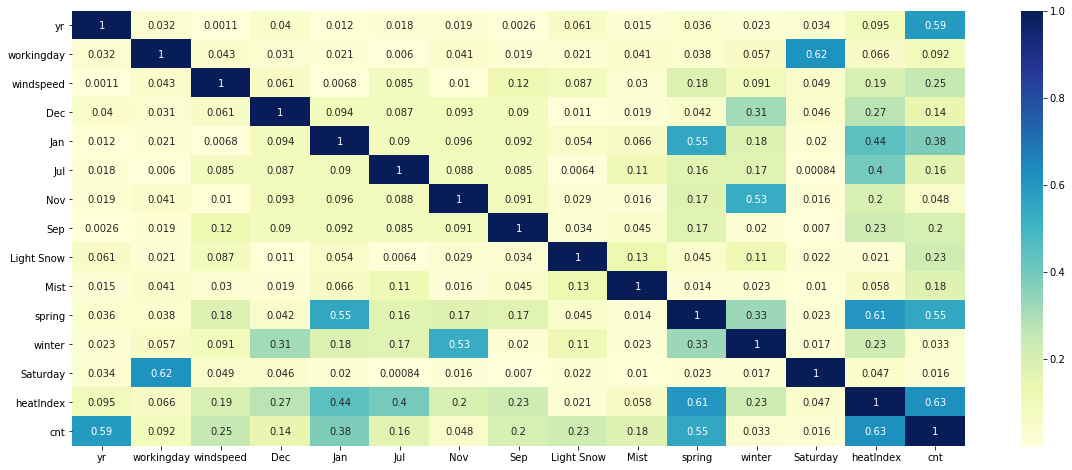

In [791]:
# Correlation between predictor variables and target variable
plt.figure(figsize=(20,8))

sns.heatmap(abs(df_train2[list(X_train_nc2.columns) + ['cnt']].corr()),cmap='YlGnBu',annot=True)
plt.show()

### Model 2.3

In [792]:
# Droping the September feature
X_train_new2=X_train_new2.drop('Sep',axis=1)
lr=sm.OLS(y_train2,X_train_new2).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     195.2
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          1.80e-185
Time:                        22:18:14   Log-Likelihood:                 500.34
No. Observations:                 510   AIC:                            -972.7
Df Residuals:                     496   BIC:                            -913.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2793      0.025     11.036      0.000       0.230       0.329
yr             0.2371      0.008     28.846      0.000       0.221       0.253
workingday     0.0564      0.011      5.049      0.000       0.034       0.078
windspeed     -0.1626      0.025     -6.420      0.000      -0.212      -0.113
Dec           -0.0608      0.018     -3.464      0.001      -0.095      -0.026
Jan           -0.0618      0.018     -3.375      0.001      -0.098      -0.026
Jul           -0.0616      0.017     -3.621      0.000      -0.095      -0.028
Nov           -0.0607      0.019     -3.239      0.001      -0.098      -0.024
Light Snow    -0.3072      0.025    -12.396      0.000      -0.356      -0.259
Mist          -0.0881      0.009    -10.055      0.000      -0.105      -0.071
spring        -0.1123      0.016     -7.207      0.000      -0.143      -0.082
winter         0.0654      0.014      4.607      0.000       0.038       0.093
Saturday       0.0696      0.014      4.828      0.000       0.041       0.098
heatIndex      0.3520      0.029     12.277      0.000       0.296       0.408
==============================================================================
Omnibus:                       80.518   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.230
Skew:                          -0.754   Prob(JB):                     2.26e-51
Kurtosis:                       5.950   Cond. No.                         15.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [793]:
# Checking the VIF score 
X_train_nc2 = X_train_new2.drop('const',axis=1)
vif = pd.DataFrame()
X = X_train_nc2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,heatIndex,5.77
1,workingday,4.43
2,windspeed,4.05
10,winter,2.56
9,spring,2.48
0,yr,2.05
11,Saturday,1.79
6,Nov,1.77
4,Jan,1.67
8,Mist,1.56


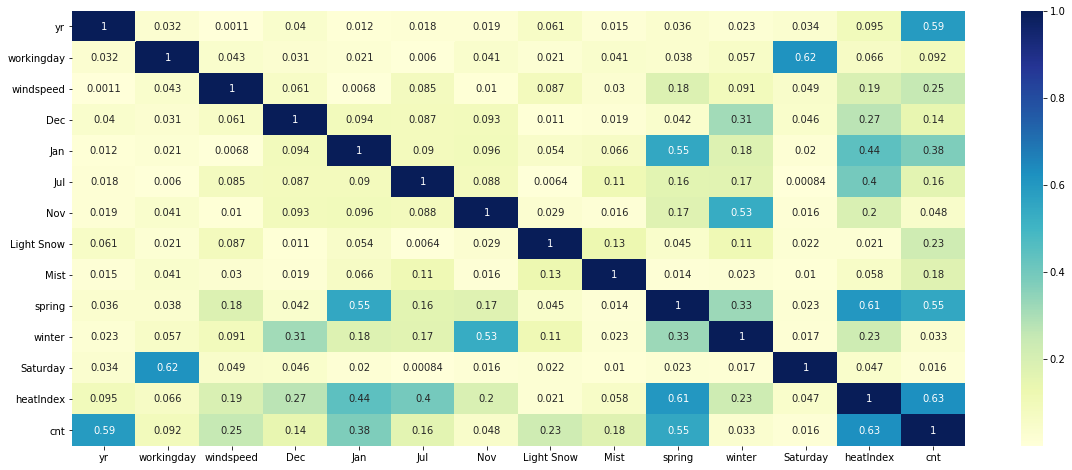

In [794]:
plt.figure(figsize=(20,8))

sns.heatmap(abs(df_train2[list(X_train_nc2.columns) + ['cnt']].corr()),cmap='YlGnBu',annot=True)
plt.show()

### Model 2.4

In [795]:
# Droping the Saturday feature as it is least corelated with the demand variable
X_train_new2=X_train_new2.drop('Saturday',axis=1)
lr=sm.OLS(y_train2,X_train_new2).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     200.6
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          1.04e-181
Time:                        22:18:15   Log-Likelihood:                 488.63
No. Observations:                 510   AIC:                            -951.3
Df Residuals:                     497   BIC:                            -896.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3130      0.025     12.593      0.000       0.264       0.362
yr             0.2366      0.008     28.160      0.000       0.220       0.253
workingday     0.0230      0.009      2.562      0.011       0.005       0.041
windspeed     -0.1592      0.026     -6.152      0.000      -0.210      -0.108
Dec           -0.0580      0.018     -3.236      0.001      -0.093      -0.023
Jan           -0.0606      0.019     -3.239      0.001      -0.097      -0.024
Jul           -0.0616      0.017     -3.544      0.000      -0.096      -0.027
Nov           -0.0637      0.019     -3.327      0.001      -0.101      -0.026
Light Snow    -0.3012      0.025    -11.904      0.000      -0.351      -0.251
Mist          -0.0860      0.009     -9.616      0.000      -0.104      -0.068
spring        -0.1147      0.016     -7.205      0.000      -0.146      -0.083
winter         0.0637      0.015      4.387      0.000       0.035       0.092
heatIndex      0.3499      0.029     11.940      0.000       0.292       0.407
==============================================================================
Omnibus:                       67.911   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.113
Skew:                          -0.614   Prob(JB):                     3.91e-46
Kurtosis:                       5.886   Cond. No.                         15.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [796]:
# Checking the VIF score , considered the R2 score less then 80% with in the predictor variables.  
X_train_nc2 = X_train_new2.drop('const',axis=1)
vif = pd.DataFrame()
X = X_train_nc2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,heatIndex,4.95
2,windspeed,3.92
1,workingday,2.94
10,winter,2.54
9,spring,2.42
0,yr,2.05
6,Nov,1.76
4,Jan,1.66
8,Mist,1.55
3,Dec,1.46


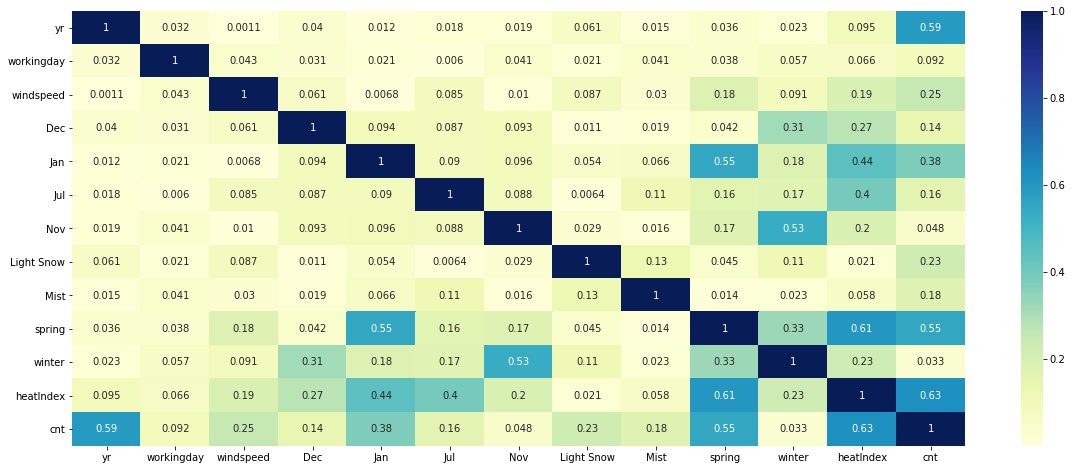

In [797]:
plt.figure(figsize=(20,8))

sns.heatmap(abs(df_train2[list(X_train_nc2.columns) + ['cnt']].corr()),cmap='YlGnBu',annot=True)

In [798]:
# Droping the workday feature as it is least corelated with the demand variable and other variables
X_train_new2=X_train_new2.drop('workingday',axis=1)
lr=sm.OLS(y_train2,X_train_new2).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     215.8
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          1.78e-181
Time:                        22:18:16   Log-Likelihood:                 485.28
No. Observations:                 510   AIC:                            -946.6
Df Residuals:                     498   BIC:                            -895.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3290      0.024     13.593      0.000       0.281       0.377
yr             0.2372      0.008     28.091      0.000       0.221       0.254
windspeed     -0.1619      0.026     -6.227      0.000      -0.213      -0.111
Dec           -0.0582      0.018     -3.230      0.001      -0.094      -0.023
Jan           -0.0609      0.019     -3.232      0.001      -0.098      -0.024
Jul           -0.0630      0.017     -3.609      0.000      -0.097      -0.029
Nov           -0.0640      0.019     -3.322      0.001      -0.102      -0.026
Light Snow    -0.2987      0.025    -11.749      0.000      -0.349      -0.249
Mist          -0.0850      0.009     -9.459      0.000      -0.103      -0.067
spring        -0.1157      0.016     -7.231      0.000      -0.147      -0.084
winter         0.0618      0.015      4.240      0.000       0.033       0.090
heatIndex      0.3510      0.029     11.914      0.000       0.293       0.409
==============================================================================
Omnibus:                       74.116   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              202.297
Skew:                          -0.713   Prob(JB):                     1.18e-44
Kurtosis:                       5.736   Cond. No.                         13.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [799]:
# Checking the VIF score , considered the R2 score less then 80% with in the predictor variables.  
X_train_nc2 = X_train_new2.drop('const',axis=1)
vif = pd.DataFrame()
X = X_train_nc2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,heatIndex,4.01
1,windspeed,3.88
9,winter,2.53
8,spring,2.37
0,yr,2.04
5,Nov,1.76
3,Jan,1.65
7,Mist,1.54
2,Dec,1.45
4,Jul,1.30


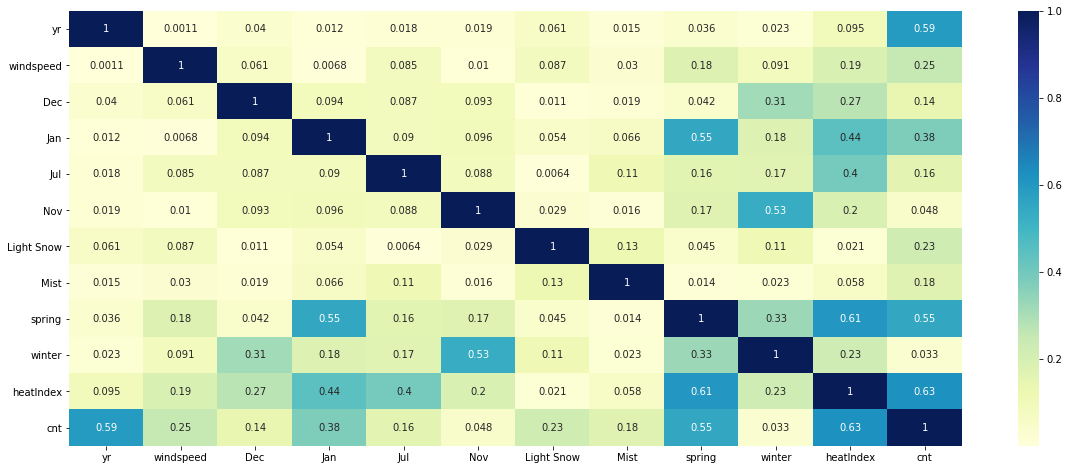

In [800]:
plt.figure(figsize=(20,8))

sns.heatmap(abs(df_train2[list(X_train_nc2.columns) + ['cnt']].corr()),cmap='YlGnBu',annot=True)

## Residual Analysis train

In [801]:
# Predicting the demand based on the model on train data
y_train_pred=lr.predict(X_train_new2)
r=r2_score(y_train2,y_train_pred)
r

0.8265806910947396

Text(0.5, 0, 'Errors')

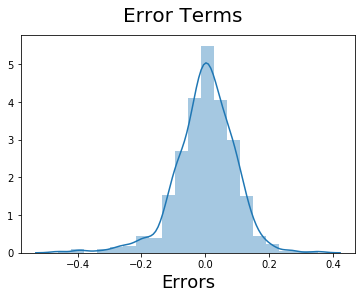

In [802]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Evaluation

In [803]:
df_test2.head()

,yr,holiday,workingday,windspeed,cnt,Aug,Dec,Feb,Jan,Jul,...,spring,summer,winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,heatIndex
184,0,1,0,5.459106,6043,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,80.054355
535,1,0,1,7.625404,6211,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,82.535508
299,0,0,1,13.250121,2659,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,65.774906
221,0,0,1,13.417286,4780,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,78.771661
152,0,0,1,19.583229,4968,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,74.401075


In [804]:
# scalling the test data based on scalled train data
df_test2[vars2]=mms.transform(df_test2[vars2])

In [805]:
# checking the r2 score on test data
y_test2=df_test2['cnt']
X_test2=df_test2.loc[:,df_test2.columns!='cnt']
X_test2=sm.add_constant(X_test2)
X_test2=X_test2[X_train_new2.columns]
y_test_pred2=lr.predict(X_test2)
r_sq=r2_score(y_test2,y_test_pred2)
r_sq

0.8095300043221929

- Observation : Almost 81% variance in the data can be explained by the model and effect of multicolinearity  predictior variables has come down, considering the VFI less than 5 (R2 score less than 80%).

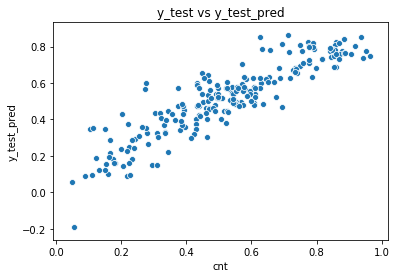

In [806]:
sns.scatterplot(y_test2,y_test_pred2)
plt.ylabel('y_test_pred')
plt.title('y_test vs y_test_pred')
plt.show()

We can see that the equation of our best fitted line is:

Demand(cnt)=0.351×heatIndex-0.2987×Lightsnow+0.2372×yr-0.1619×windspeed-0.1157×spring-0.0850×mist-0.064×nov-0.063×july+0.0618×winter -0.0609 jan-0.0582*dec+0.3290

## Considering the 100 samples of data and testing the accuracy of the model

In [807]:
# Considering the 100 samples of data and testing the accuracy of the modelS

a=[]
for i in range(100):
    

#np.random.seed(0)
    df_train2,df_test2=train_test_split(bikes,train_size=0.7,test_size=0.3)
    df_test2[vars2]=mms.transform(df_test2[vars2])


    y_test2=df_test2['cnt']
    X_test2=df_test2.loc[:,df_test2.columns!='cnt']
    X_test2=sm.add_constant(X_test2)
    X_test2=X_test2[X_train_new2.columns]
    y_test_pred2=lr.predict(X_test2)
    r_sq=r2_score(y_test2,y_test_pred2)
    a.append(r_sq)

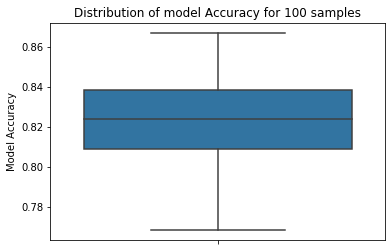

In [808]:
sns.boxplot(a,orient='v')
plt.title('Distribution of model Accuracy for 100 samples')
plt.ylabel('Model Accuracy')
plt.show()